## Coding Exercise #0708a

### 1. Dimensional reduction with PCA:

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.datasets import load_iris
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler


#### 1.1. Read in data and preprocess:

In [ ]:
# Read data.
data_raw = load_iris()
X = data_raw['data']
y = data_raw['target'].reshape(-1,1)

In [ ]:
# Scaling.
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X).astype('float32')

In [ ]:
# Convert into a DataFrame and view.
header = ['SepalLength','SepalWidth','PetalLength','PetalWidth']      # Column names.
df = pd.DataFrame(X_scaled,columns=header)
df.head(3)

,SepalLength,SepalWidth,PetalLength,PetalWidth
0,0.222222,0.625000,0.067797,0.041667
1,0.166667,0.416667,0.067797,0.041667
2,0.111111,0.500000,0.050847,0.041667


#### 1.2. Display the PCA result:

In [ ]:
# Reduce to 2 dimension.
pca = PCA(n_components = 2)
X_pca = pca.fit_transform(X_scaled)

In [ ]:
# Convert the integer labels into color names.
mycolor = []
for i in y:
    if i == 0:
        mycolor.append('red')
    elif i == 1:
        mycolor.append('green')
    else:
        mycolor.append('blue')

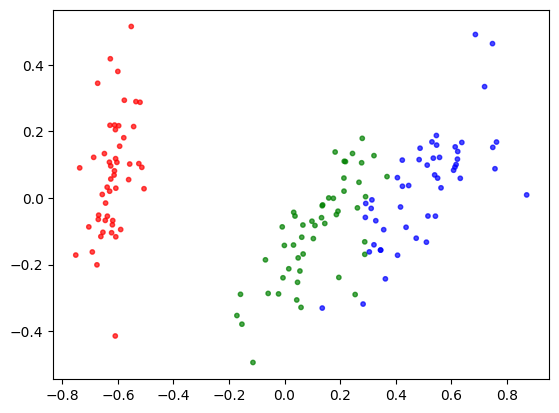

In [ ]:
# Visualize.
plt.scatter(X_pca[:,0],X_pca[:,1],marker="o",alpha=0.7, s=10, c=mycolor)
plt.show()

### 2. Dimensional reduction with AutoEncoder:

#### 2.1. Define an AutoEncoder model:

In [ ]:
# Hyperparameters definition.
n_input = 4             # Input layers has as many nodes as the number of variables.
n_hidden = 2            # The number of nodes in the hidden layer = 2 <= my target.
n_output = n_input      # The output should have the same number of nodes as the input.
learn_rate = 0.0001
n_epochs = 10001

In [ ]:
# Variables definition.
initializer = tf.initializers.VarianceScaling(seed=123)
W1 = tf.Variable(initializer([n_input, n_hidden]), dtype=tf.float32)
W2 = tf.Variable(initializer([n_hidden, n_output]), dtype=tf.float32)
b1 = tf.Variable(tf.zeros(n_hidden))
b2 = tf.Variable(tf.zeros(n_output))

In [ ]:
# Placeholder definition.
#X = tf.placeholder(tf.float32, shape=[None, n_input])

In [ ]:
# AutoEncoder model definition.
def AE_encoder(X):
    return tf.matmul(X, W1) + b1                  # No activation.

def AE_decoder(hidden_layer):
    return tf.matmul(hidden_layer, W2) + b2

def model_AE(X):
    hidden_layer = AE_encoder(X)
    y_model = AE_decoder(hidden_layer)
    return y_model

In [ ]:
def loss_fn(X, y_model):
  return tf.reduce_mean(tf.square(X - y_model))    # 'X' takes the place of 'y'!!!

In [ ]:
optimizer = tf.optimizers.Adam(learning_rate = learn_rate)

#### 2.2. AutoEncoder training:

In [ ]:
@tf.function
def train_step(X):
    with tf.GradientTape() as tape:
        y_model = model_AE(X)
        loss = loss_fn(X, y_model)
    gradients = tape.gradient(loss, [W1, W2, b1, b2])
    optimizer.apply_gradients(zip(gradients, [W1, W2, b1, b2]))
    return loss

# Training.
for i in range(n_epochs):
    mse = train_step(X_scaled)
    if i % 1000 == 0:
        print("Step : {}    ,    MSE : {}".format(i, mse))

X_auto = AE_encoder(X_scaled)            # Get the reduced dimensional representation from the hidden layer!!!

Step : 0    ,    MSE : 0.38052138686180115
Step : 1000    ,    MSE : 0.19161540269851685
Step : 2000    ,    MSE : 0.11893751472234726
Step : 3000    ,    MSE : 0.07954656332731247
Step : 4000    ,    MSE : 0.05591774731874466
Step : 5000    ,    MSE : 0.041168779134750366
Step : 6000    ,    MSE : 0.0317293182015419
Step : 7000    ,    MSE : 0.02522808313369751
Step : 8000    ,    MSE : 0.02038692869246006
Step : 9000    ,    MSE : 0.016635717824101448
Step : 10000    ,    MSE : 0.013669070787727833


#### 2.3. Compare the results of PCA vs AutoEncoder:

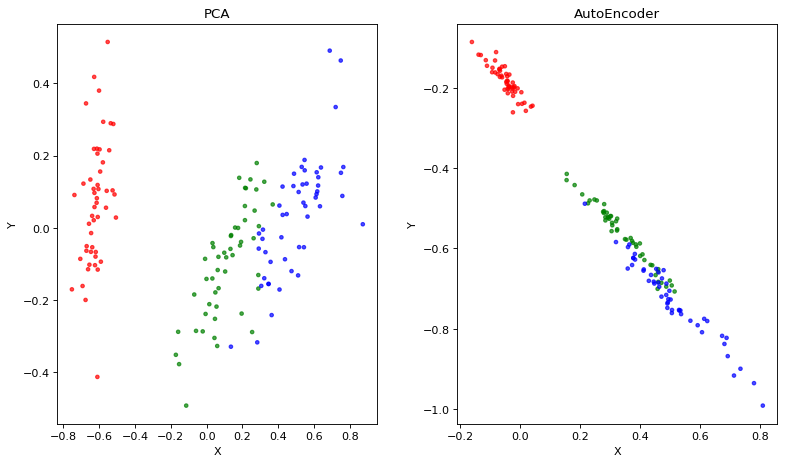

In [ ]:
fig=plt.figure(figsize=(10,5), dpi=80)       # figsize= (Width, Height). DPI 세팅.
axes1 = fig.add_axes([0,0,0.4,1])            # Left, Bottom, Width, Height
axes2 = fig.add_axes([0.5,0,0.4,1])          # Left, Bottom, Width, Height
axes1.scatter(X_pca[:,0],X_pca[:,1],marker="o",alpha=0.7, s=10, c=mycolor)
axes2.scatter(X_auto[:,0],X_auto[:,1],marker="o",alpha=0.7, s=10, c=mycolor)
axes1.set_xlabel('X')
axes1.set_ylabel('Y')
axes1.set_title('PCA')
axes2.set_xlabel('X')
axes2.set_ylabel('Y')
axes2.set_title('AutoEncoder')
plt.show()